# Reto Evaluación - Modelo Tabular

**Alumno:** César Zamora Martínez

**Fecha:** 09/03/2024

Links de interes:

1) Real State: https://challengedata.ens.fr/challenges/68

2) Repositorio Datos: https://github.com/pedro9olivares/Bourbaki-ML-and-AI/tree/main/Datos-de-evaluacion-final

In [30]:
import os
import pandas as pd
import seaborn as sns
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import sklearn
from sklearn.preprocessing import MinMaxScaler

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

from PIL import Image
import shutil

In [3]:
PATH_TABULAR_DATA = "./drive/MyDrive/real_estate_price_prediction_processed_09042024.csv"

In [34]:
data = pd.read_csv(PATH_TABULAR_DATA)

In [35]:
data[["price_scaled"]] = MinMaxScaler().fit_transform(data[["price"]])

In [37]:
data.head()

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,price,price_scaled
0,35996577,0,43.643880,7.117183,8452,199,63.0,3.479524,3995.665362,205.385148,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,355000.0,0.145320
1,35811033,0,45.695757,4.895610,8234,3347,90.0,3.000000,3995.665362,223.000000,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0,0.072778
2,35731841,12,47.966791,-1.220451,5235,1650,61.0,3.479524,370.000000,205.385148,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39000.0,0.006390
3,35886765,12,47.289292,-1.878805,1929,2050,142.0,3.479524,764.000000,217.000000,...,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,299000.0,0.120699
4,35781137,0,45.718992,4.844234,4476,3334,88.0,3.000000,3995.665362,205.385148,...,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,478000.0,0.199397


In [38]:
x=data.drop(columns=["id_annonce","price", "price_scaled"])
y=data["price_scaled"]

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [70]:
 # since data is ready we can develop the model:

class linearRegression(nn.Module): # all the dependencies from torch will be given to this class [parent class] # nn.Module contains all the building block of neural networks:
  def __init__(self,input_dim):
    super(linearRegression,self).__init__()  # building connection with parent and child classes
    self.fc1=nn.Linear(input_dim,64)          # hidden layer 1
    self.fc2=nn.Linear(64,32)                  # hidden layer 2
    self.fc3=nn.Linear(32,16)                   # hidden layer 3
    self.fc4=nn.Linear(16,1)                   # last layer
    self.DO = nn.Dropout(p=0.2)

  def forward(self,x):
    out=self.DO(torch.relu(self.fc1(x)))              # input * weights + bias for layer 1
    out=self.DO(torch.relu(self.fc2(out)))            # input * weights + bias for layer 2
    out=self.DO(torch.relu(self.fc3(out)))            # input * weights + bias for layer 3
    out=self.fc4(out)                        # input * weights + bias for last layer
    return out                               # final outcome



In [71]:
input_dim=X_train.shape[1]
#torch.manual_seed(42)  # to make initilized weights stable:
model=linearRegression(input_dim)

In [72]:
# Tunners
LR = 0.001

In [73]:
# select loss and optimizers
#loss=nn.MSELoss() # loss function
loss= nn.L1Loss()
optimizers=optim.Adam(params=model.parameters(),lr=LR, amsgrad=True, weight_decay=LR * 0.1)

# training the model:

num_of_epochs=3000
for i in range(num_of_epochs):
  # give the input data to the architecure
  y_train_prediction=model(X_train)  # model initilizing
  loss_value=loss(y_train_prediction.squeeze(),y_train)   # find the loss function:
  optimizers.zero_grad() # make gradients zero for every iteration so next iteration it will be clear
  loss_value.backward()  # back propagation
  optimizers.step()  # update weights in NN

  # print the loss in training part:
  if i % 10 == 0:
    print(f'[epoch:{i}]: The loss value for training part={loss_value}')

[epoch:0]: The loss value for training part=124.71215057373047
[epoch:10]: The loss value for training part=47.79375076293945
[epoch:20]: The loss value for training part=23.61536407470703
[epoch:30]: The loss value for training part=15.65408992767334
[epoch:40]: The loss value for training part=10.397018432617188
[epoch:50]: The loss value for training part=7.881112575531006
[epoch:60]: The loss value for training part=4.544580936431885
[epoch:70]: The loss value for training part=3.089540481567383
[epoch:80]: The loss value for training part=2.028944969177246
[epoch:90]: The loss value for training part=1.4292348623275757
[epoch:100]: The loss value for training part=0.7254387736320496
[epoch:110]: The loss value for training part=0.46100759506225586
[epoch:120]: The loss value for training part=0.35145819187164307
[epoch:130]: The loss value for training part=0.29803067445755005
[epoch:140]: The loss value for training part=0.26599735021591187
[epoch:150]: The loss value for trainin

In [74]:
# we can do check it with test data:

with torch.no_grad():
  model.eval()   # make model in evaluation stage
  y_train_prediction=model(X_train)
  train_loss=loss(y_train_prediction.squeeze(),y_train)
  print(f'Test loss value : {train_loss.item():.4f}')

Test loss value : 0.0848


In [75]:
# we can do check it with test data:

with torch.no_grad():
  model.eval()   # make model in evaluation stage
  y_test_prediction=model(X_test)
  test_loss=loss(y_test_prediction.squeeze(),y_test)
  print(f'Test loss value : {test_loss.item():.4f}')

Test loss value : 0.0840


In [76]:
y_test.numpy()

array([0.2824907 , 0.22445686, 0.09871688, ..., 0.1206994 , 0.06068713,
       0.11454429], dtype=float32)

In [77]:
y_test_prediction.squeeze()

tensor([0.0998, 0.1021, 0.1013,  ..., 0.1012, 0.1009, 0.1098])

<Axes: >

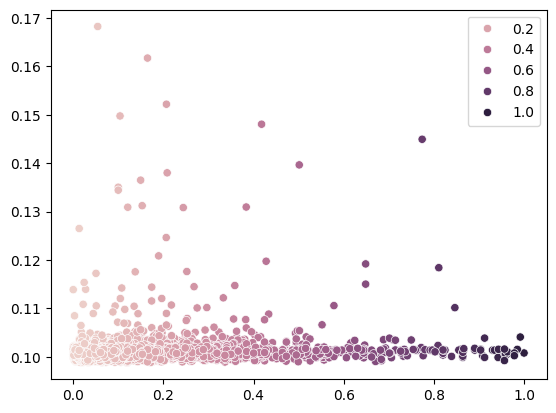

In [78]:
sns.scatterplot(
    x = y_test.numpy(),
    y = y_test_prediction.squeeze().numpy(),
    hue=y_test.numpy()
    )

In [79]:
indiv_mae = np.absolute(
    (y_test.numpy() - y_test_prediction.squeeze().numpy())/y_test.numpy()
    )

In [80]:
indiv_mae

array([0.64655286, 0.54534453, 0.02621869, ..., 0.16174927, 0.6624963 ,
       0.04143867], dtype=float32)